In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/lego-minifigures-classification/index.csv
/kaggle/input/lego-minifigures-classification/LICENSE
/kaggle/input/lego-minifigures-classification/metadata.csv
/kaggle/input/lego-minifigures-classification/test.csv
/kaggle/input/lego-minifigures-classification/star-wars/0007/006.jpg
/kaggle/input/lego-minifigures-classification/star-wars/0007/002.jpg
/kaggle/input/lego-minifigures-classification/star-wars/0007/001.jpg
/kaggle/input/lego-minifigures-classification/star-wars/0007/007.jpg
/kaggle/input/lego-minifigures-classification/star-wars/0007/005.jpg
/kaggle/input/lego-minifigures-classification/star-wars/0007/004.jpg
/kaggle/input/lego-minifigures-classification/star-wars/0007/003.jpg
/kaggle/input/lego-minifigures-classification/star-wars/0007/008.jpg
/kaggle/input/lego-minifigures-classification/star-wars/0006/006.jpg
/kaggle/input/lego-minifigures-classification/star-wars/0006/002.jpg
/kaggle/input/lego-minifigures-classification/star-wars/0006/010.jpg
/kaggle/input/leg

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [4]:
df = pd.read_csv('/kaggle/input/lego-minifigures-classification/index.csv')
df.head()

,path,class_id
0,marvel/0001/001.jpg,1
1,marvel/0001/002.jpg,1
2,marvel/0001/003.jpg,1
3,marvel/0001/004.jpg,1
4,marvel/0001/005.jpg,1


In [5]:
df.columns

Index(['path', 'class_id'], dtype='object')

In [6]:
def extract_color_histogram(image_path):
    img = cv2.imread(f'/kaggle/input/lego-minifigures-classification/{image_path}')
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    # Resize smaller for faster processing
    img = cv2.resize(img, (64, 64))
    # Calculate histograms for each channel and concatenate
    chans = cv2.split(img)
    features = []
    for chan in chans:
        hist = cv2.calcHist([chan], [0], None, [32], [0, 256])
        hist = cv2.normalize(hist, hist).flatten()
        features.extend(hist)
    return features

# Extract features for all images (this may take a moment)
features = []
for path in df['path']:
    features.append(extract_color_histogram(path))

In [7]:
X = np.array(features)
y = df['class_id'].values

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

In [9]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [10]:
y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.50      0.50      0.50         2
           2       0.25      0.50      0.33         2
           3       1.00      0.50      0.67         2
           4       1.00      0.50      0.67         2
           5       0.00      0.00      0.00         2
           6       0.00      0.00      0.00         3
           7       0.25      0.50      0.33         2
           8       0.00      0.00      0.00         2
           9       0.40      0.67      0.50         3
          10       0.00      0.00      0.00         2
          11       0.00      0.00      0.00         1
          12       0.00      0.00      0.00         1
          13       0.00      0.00      0.00         1
          14       0.00      0.00      0.00         1
          15       0.00      0.00      0.00         2
          16       0.00      0.00      0.00         2
          17       0.50      0.50      0.50         2
          18       0.50    

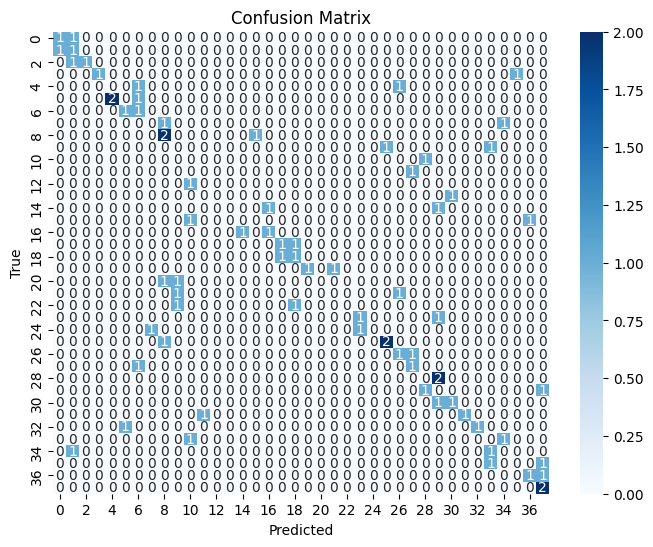

In [11]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

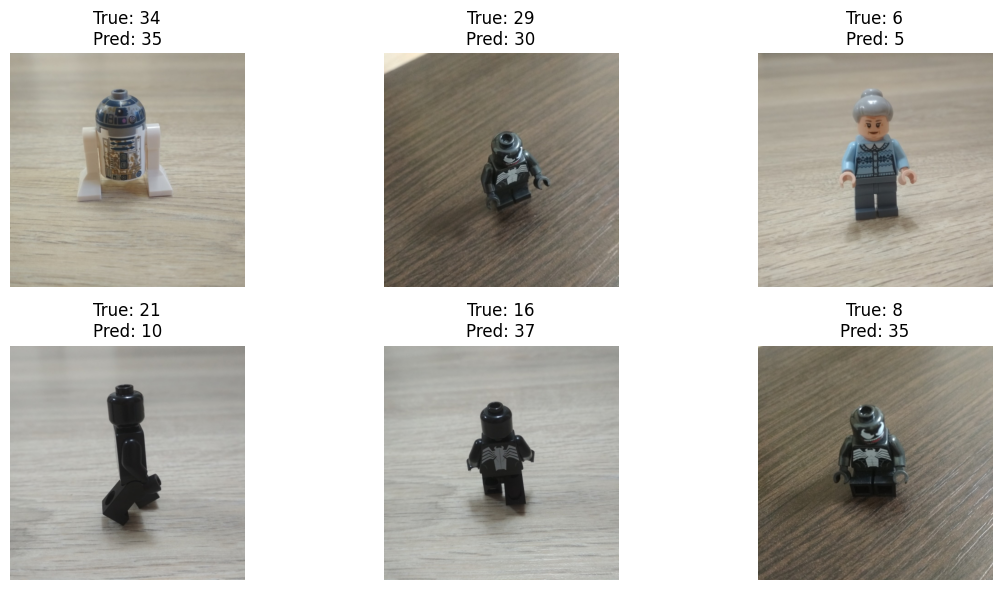

In [12]:
plt.figure(figsize=(12, 6))

for i in range(6):
    idx = np.random.randint(0, len(X_test))
    img_path = df.iloc[X_test.tolist().index(X_test[idx].tolist())]['path']
    img = cv2.imread(f'/kaggle/input/lego-minifigures-classification/{img_path}')
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    plt.subplot(2, 3, i+1)
    plt.imshow(img)
    plt.title(f"True: {y_test[idx]}\nPred: {y_pred[idx]}")
    plt.axis('off')

plt.tight_layout()
plt.show()